In [13]:
# Célula 1: Importar Bibliotecas

# Bibliotecas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Funções e modelos do scikit-learn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


In [22]:
# Célula 2: Funções Manuais para Regressão e Métricas

def manual_linear_regression(X, y):
    """
    Calcula os coeficientes da regressão linear usando a Equação Normal.
    X: Matriz de features (já padronizada).
    y: Vetor alvo.
    Retorna: (intercepto, coeficientes)
    """
    # Adicionar uma coluna de 1s para o intercepto
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Equação Normal: beta = (X^T * X)^(-1) * X^T * y
    try:
        beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    except np.linalg.LinAlgError:
        # Usar a Inversa de Moore-Penrose se a matriz for singular
        beta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        
    intercept = beta[0]
    coefficients = beta[1:]
    return intercept, coefficients

def manual_predict(X, intercept, coefficients):
    """ Faz predições usando os coeficientes calculados manualmente. """
    return X @ coefficients + intercept

def manual_r2_score(y_true, y_pred):
    """ Calcula o R² (R-quadrado) manualmente. """
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

def manual_rmse(y_true, y_pred):
    """ Calcula o RMSE (Raiz do Erro Quadrático Médio) manualmente. """
    mse = np.mean((y_true - y_pred)**2)
    return np.sqrt(mse)

print("Funções manuais de cálculo definidas.")

Funções manuais de cálculo definidas.


In [23]:
# Célula 3: Parte A - Tarefa 1: Carregar e Preparar os Dados

# 1. Carregar o dataset
diabetes_dataset = load_diabetes(as_frame=True)
df = diabetes_dataset.frame

# Exibe as 5 primeiras linhas para verificação
print("Amostra do DataFrame:")
display(df.head())

# Salva o dataset completo em um arquivo CSV para referência
df.to_csv('diabetes_dataset_completo.csv', index=False)
print("\nDataset salvo com sucesso no arquivo: 'diabetes_dataset_completo.csv'")

Amostra do DataFrame:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Dataset salvo com sucesso no arquivo: 'diabetes_dataset_completo.csv'


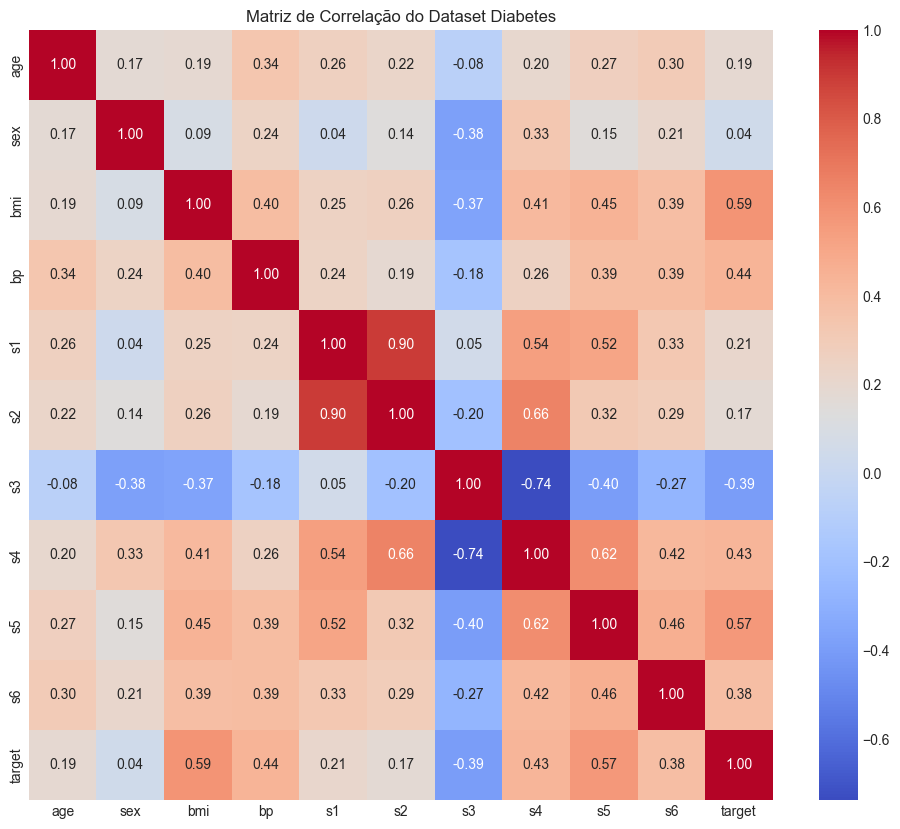


Correlação de cada feature com a variável 'target':
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [24]:
# Célula 4: Parte A - Tarefa 2: Análise Exploratória de Dados (EDA)

# 2.1 Calcular a matriz de correlação
correlation_matrix = df.corr()

# 2.2 Visualizar a matriz com um heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset Diabetes')
plt.show()

# 2.3 Focar na correlação com a variável alvo
print("\nCorrelação de cada feature com a variável 'target':")
print(correlation_matrix['target'].sort_values(ascending=False))

Distribuição de Valores por Feature:


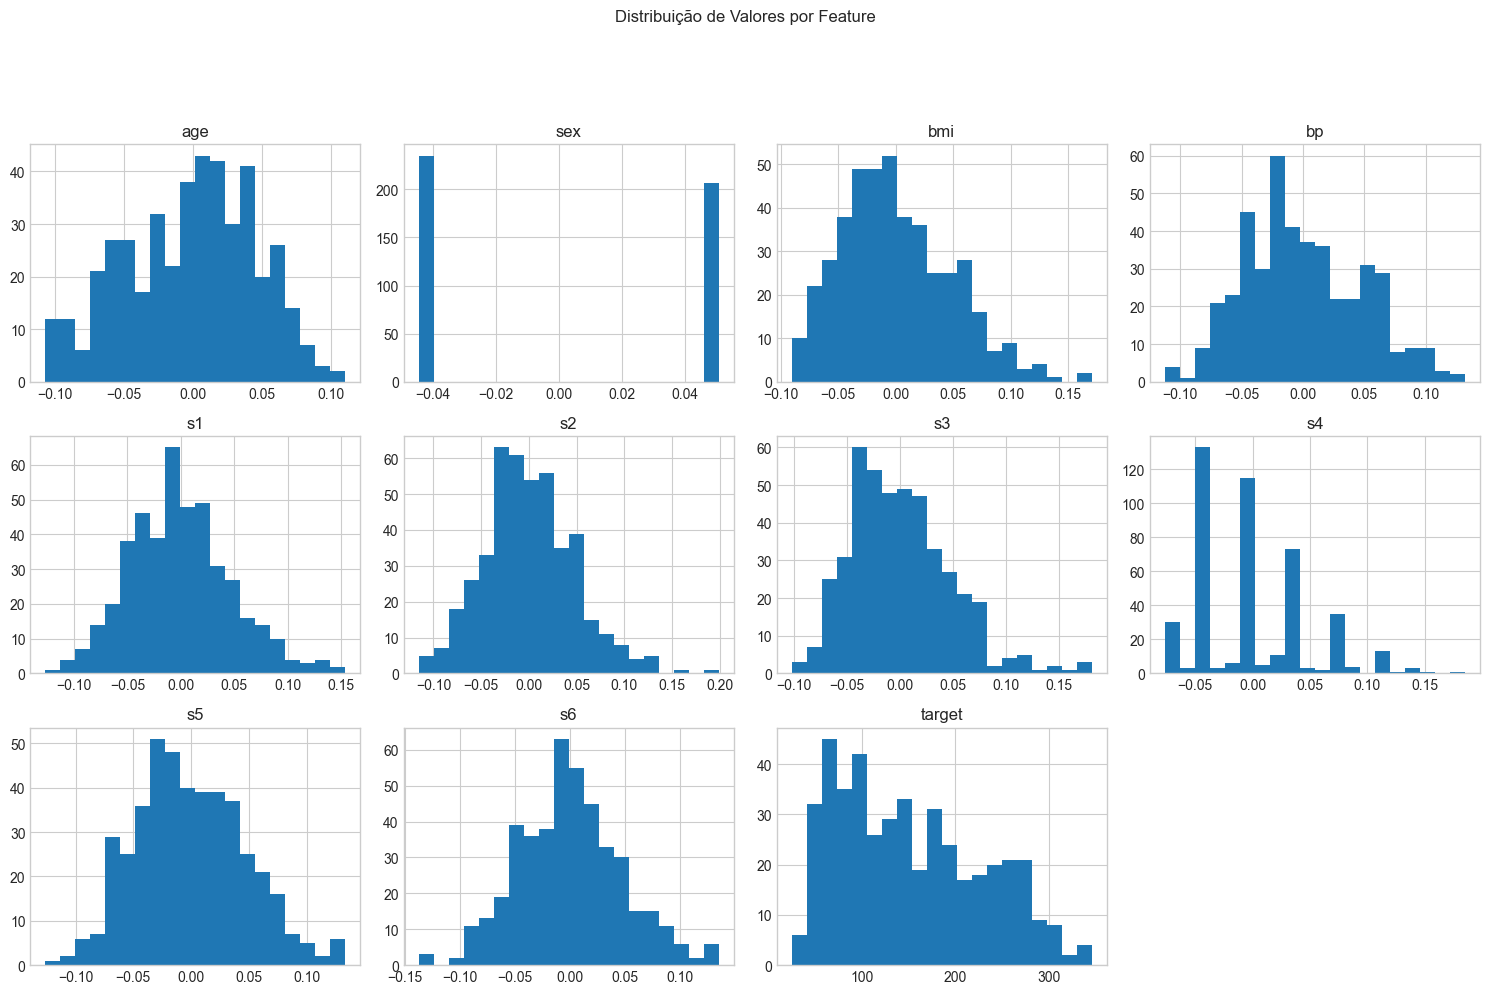

In [25]:
# Célula 4.1: Análise de Distribuição (Histogramas)

# Plotar a distribuição de cada feature para analisar suas escalas
print("Distribuição de Valores por Feature:")
df.hist(bins=20, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribuição de Valores por Feature', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [26]:
# Célula 5: Modelo Inicial (Todas as Features) com Cálculos Manuais

# 1. Definir features (X) e alvo (y)
X = df.drop('target', axis=1)
y = df['target']
feature_names = X.columns

# 2. Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Pré-processamento (Padronização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modelo de Regressão Linear (MANUAL)
intercept_full, coef_full_vals = manual_linear_regression(X_train_scaled, y_train.values)

# 5. Predições (MANUAL)
y_train_pred = manual_predict(X_train_scaled, intercept_full, coef_full_vals)
y_test_pred = manual_predict(X_test_scaled, intercept_full, coef_full_vals)

# 6. Avaliação (MANUAL)
r2_train = manual_r2_score(y_train.values, y_train_pred)
r2_test = manual_r2_score(y_test.values, y_test_pred)
rmse_test = manual_rmse(y_test.values, y_test_pred)

print("--- Avaliação do Modelo com Todas as Features (Cálculos Manuais) ---")
print(f"R² (Treino): {r2_train:.4f}")
print(f"R² (Teste): {r2_test:.4f}")
print(f"RMSE (Teste): {rmse_test:.4f}\n")

# 7. Coeficientes
print("Intercepto:", intercept_full)
coef_full = pd.Series(coef_full_vals, index=feature_names)
print("\nFeatures mais importantes por peso absoluto:")
print(coef_full.abs().sort_values(ascending=False))

--- Avaliação do Modelo com Todas as Features (Cálculos Manuais) ---
R² (Treino): 0.5279
R² (Teste): 0.4526
RMSE (Teste): 53.8534

Intercepto: 153.73654390934846

Features mais importantes por peso absoluto:
s1     44.448856
s5     35.161195
bmi    25.607121
s2     24.640954
bp     16.828872
s4     13.138784
sex    11.511809
s3      7.676978
s6      2.351364
age     1.753758
dtype: float64


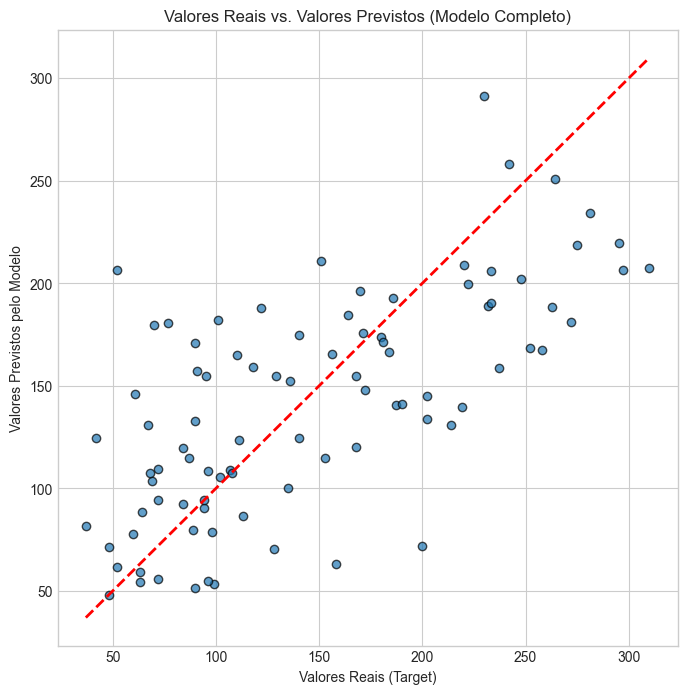

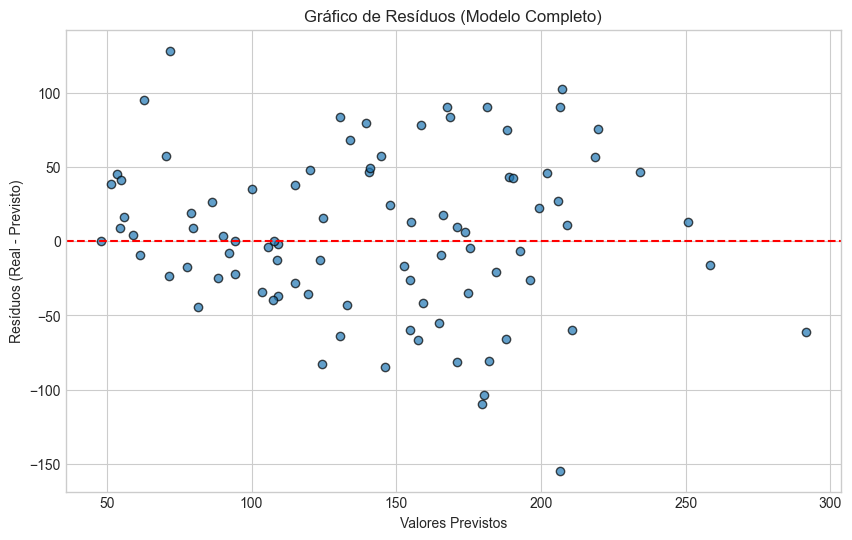

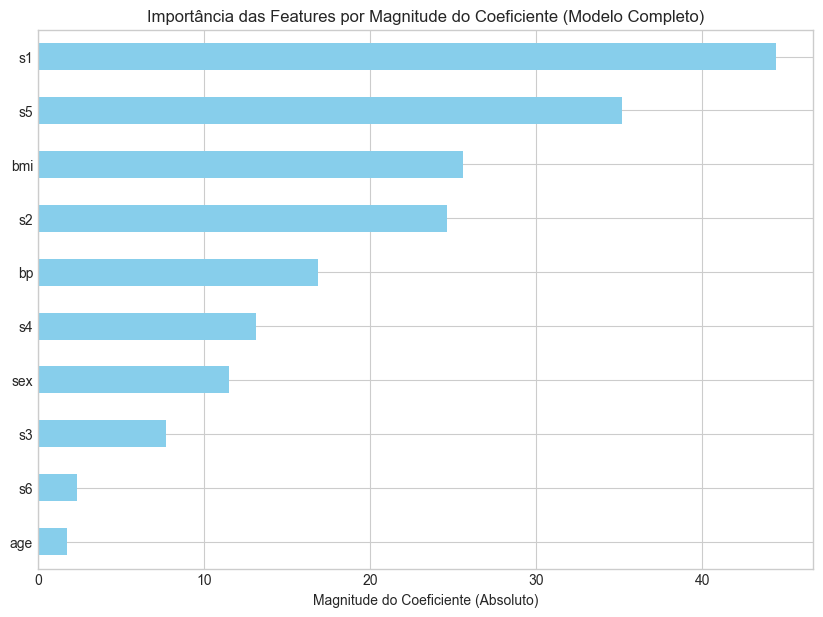

In [27]:
# Célula 5.1: Análise Gráfica do Modelo Inicial

# --- 1. Gráfico de Predito vs. Real ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
# Adiciona a linha de referência (y=x) onde as predições seriam perfeitas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores Reais vs. Valores Previstos (Modelo Completo)')
plt.xlabel('Valores Reais (Target)')
plt.ylabel('Valores Previstos pelo Modelo')
plt.show()

# --- 2. Gráfico de Resíduos ---
residuos = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuos, alpha=0.7, edgecolors='k')
# Adiciona a linha de referência (y=0) onde os erros seriam nulos
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Resíduos (Modelo Completo)')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos (Real - Previsto)')
plt.show()

# --- 3. Gráfico de Importância das Features ---
# Usamos a Série 'coef_full' que criamos na Célula 4
plt.figure(figsize=(10, 7))
coef_full.abs().sort_values().plot(kind='barh', color='skyblue')
plt.title('Importância das Features por Magnitude do Coeficiente (Modelo Completo)')
plt.xlabel('Magnitude do Coeficiente (Absoluto)')
plt.show()

In [29]:
# Célula 6: Modelo com Features Selecionadas (pela Correlação)

# 1. Identificar e selecionar features a serem removidas com base na menor correlação
# Da nossa análise na Célula 3, 'sex' e 'age' têm os menores valores de correlação absoluta.
features_to_drop = ['sex', 'age']
X_reduced = X.drop(columns=features_to_drop)
feature_names_reduced = X_reduced.columns
print(f"Features removidas (menor correlação com o alvo): {features_to_drop}\n")

# 2. Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 3. Pré-processamento
scaler_reduced = StandardScaler()
X_train_scaled = scaler_reduced.fit_transform(X_train)
X_test_scaled = scaler_reduced.transform(X_test)

# 4. Modelo de Regressão Linear
reg_reduced = LinearRegression()
reg_reduced.fit(X_train_scaled, y_train)

# 5. Predições
y_train_pred_reduced = reg_reduced.predict(X_train_scaled)
y_test_pred_reduced = reg_reduced.predict(X_test_scaled)

# 6. Avaliação (agora incluindo R² de treino)
r2_train_reduced = r2_score(y_train, y_train_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)
rmse_test_reduced = np.sqrt(mean_squared_error(y_test, y_test_pred_reduced))

print("--- Avaliação do Modelo Reduzido ---")
print(f"R² (Treino): {r2_train_reduced:.4f}")
print(f"R² (Teste): {r2_test_reduced:.4f}")
print(f"RMSE (Teste): {rmse_test_reduced:.4f}\n")

# 7. Coeficientes
print("Intercepto:", reg_reduced.intercept_)
coef_reduced = pd.Series(reg_reduced.coef_, index=feature_names_reduced)
print("\nFeatures mais importantes (modelo reduzido):")
print(coef_reduced.abs().sort_values(ascending=False))

Features removidas (menor correlação com o alvo): ['sex', 'age']

--- Avaliação do Modelo Reduzido ---
R² (Treino): 0.5107
R² (Teste): 0.4367
RMSE (Teste): 54.6278

Intercepto: 153.73654390934846

Features mais importantes (modelo reduzido):
s1     42.236728
s5     36.466223
bmi    27.861157
s2     24.321307
bp     14.758178
s3      9.162575
s4      8.739119
s6      1.861219
dtype: float64


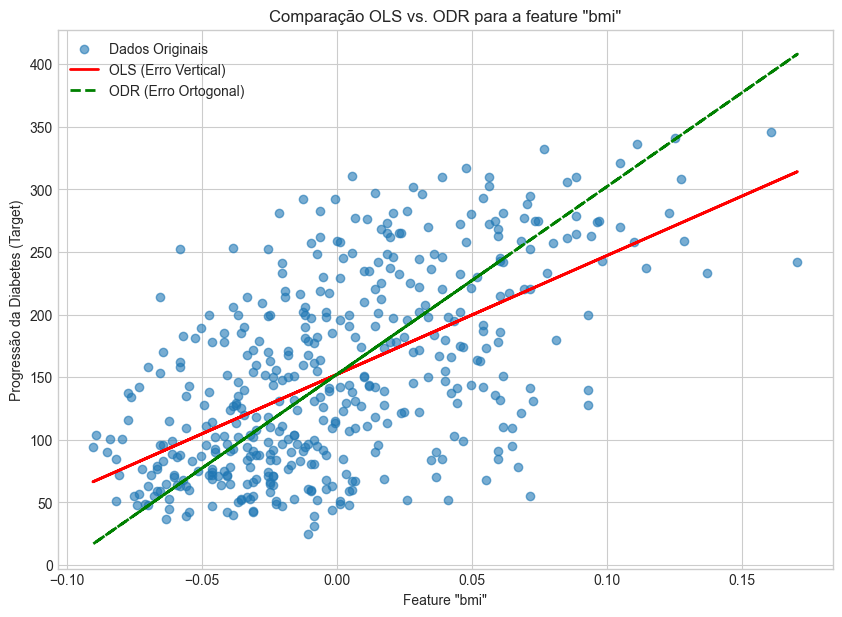


--- Comparação dos Coeficientes ---
OLS -> Inclinação (m): 949.44, Intercepto (b): 152.13
ODR -> Inclinação (m): 1500.00, Intercepto (b): 152.12


In [28]:
# Célula 7: Parte B - Comparação OLS vs. ODR

# --- 1. Preparar Dados para Análise de 1 Feature ---
X_bmi = df[['bmi']].values
y_target = df['target'].values

# --- 2. Modelo de Referência: OLS ---
ols_model = LinearRegression()
ols_model.fit(X_bmi, y_target)

# --- 3. Implementação da Regressão ODR (Busca em Grade) ---
def calcula_erro_odr(m, b, data_x, data_y):
    numerador = np.sum((m * data_x + b - data_y)**2)
    denominador = m**2 + 1
    return numerador / (denominador + 1e-9)

# Busca em grade pelos melhores parâmetros 'm' e 'b'
slopes = np.linspace(800, 1500, 100)
intercepts = np.linspace(150, 155, 100)
melhor_erro_odr = float('inf')
melhor_m_odr, melhor_b_odr = 0, 0

for m in slopes:
    for b in intercepts:
        erro = calcula_erro_odr(m, b, X_bmi.flatten(), y_target)
        if erro < melhor_erro_odr:
            melhor_erro_odr = erro
            melhor_m_odr, melhor_b_odr = m, b

# --- 4. Plot da Comparação ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))
plt.scatter(X_bmi, y_target, alpha=0.6, label='Dados Originais')
plt.plot(X_bmi, ols_model.predict(X_bmi), color='red', lw=2, label='OLS (Erro Vertical)')
plt.plot(X_bmi, (melhor_m_odr * X_bmi + melhor_b_odr), color='green', lw=2, ls='--', label='ODR (Erro Ortogonal)')
plt.title('Comparação OLS vs. ODR para a feature "bmi"')
plt.xlabel('Feature "bmi"')
plt.ylabel('Progressão da Diabetes (Target)')
plt.legend()
plt.show()

# --- 5. Resultados dos Coeficientes ---
print("\n--- Comparação dos Coeficientes ---")
print(f"OLS -> Inclinação (m): {ols_model.coef_[0]:.2f}, Intercepto (b): {ols_model.intercept_:.2f}")
print(f"ODR -> Inclinação (m): {melhor_m_odr:.2f}, Intercepto (b): {melhor_b_odr:.2f}")